# Simple Linear Regression with Gradient Descent

This notebook demonstrates the implementation of Simple Linear Regression using Gradient Descent optimization. We'll build the algorithm from scratch to understand the underlying mathematics and optimization process.

## Theory Overview

### Linear Regression
Linear regression models the relationship between a dependent variable y and an independent variable x using a linear equation:
```
y = θ₀ + θ₁x
```
where:
- θ₀ (theta_0) is the y-intercept
- θ₁ (theta_1) is the slope

### Gradient Descent
Gradient Descent is an iterative optimization algorithm that:
1. Starts with initial parameter values
2. Computes the gradient of the cost function
3. Updates parameters in the direction that reduces the cost
4. Repeats until convergence

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


## 2. Generate Synthetic Data

We'll create synthetic data with a known relationship plus some noise to simulate real-world data.

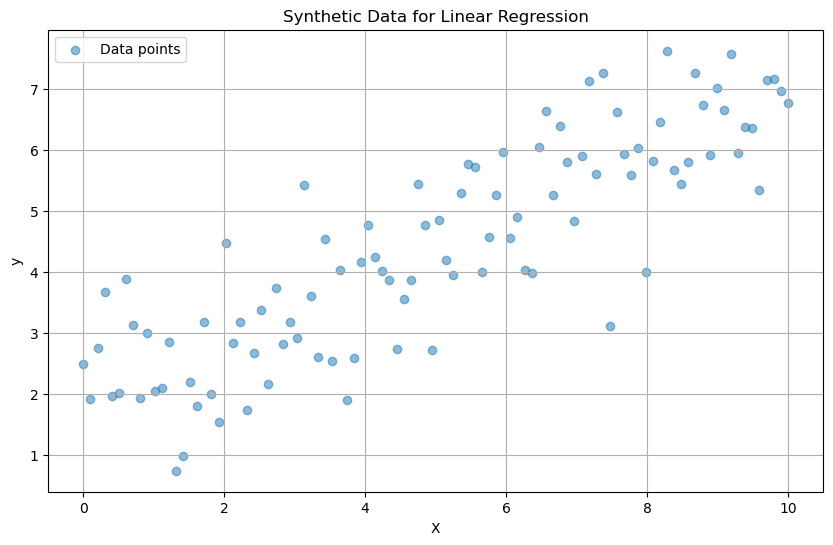

In [2]:
# Generate synthetic data
def generate_data(n_samples=100, noise_std=1):
    """
    Generate synthetic data for linear regression
    
    Parameters:
        n_samples: Number of data points
        noise_std: Standard deviation of Gaussian noise
    
    Returns:
        X: Feature values
        y: Target values
    """
    # True parameters
    true_theta0 = 2
    true_theta1 = 0.5
    
    # Generate X values
    X = np.linspace(0, 10, n_samples)
    
    # Generate y values with noise
    y = true_theta0 + true_theta1 * X + np.random.normal(0, noise_std, n_samples)
    
    return X, y

# Generate data
X, y = generate_data()

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

## 3. Cost Function Implementation

The Mean Squared Error (MSE) cost function measures how well our model fits the data:

$J(θ₀, θ₁) = \frac{1}{2m} \sum_{i=1}^m (h_{θ}(x^{(i)}) - y^{(i)})^2$

where:
- m is the number of training examples
- h_{θ}(x) = θ₀ + θ₁x is our hypothesis function
- y^{(i)} is the actual target value

In [3]:
def compute_cost(X, y, theta0, theta1):
    """
    Compute the Mean Squared Error cost
    
    Parameters:
        X: Feature values
        y: Target values
        theta0: y-intercept parameter
        theta1: slope parameter
    
    Returns:
        cost: Mean Squared Error
    """
    m = len(y)
    predictions = theta0 + theta1 * X
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

## 4. Gradient Descent Implementation

The gradient descent update rules for θ₀ and θ₁ are:

$θ₀ := θ₀ - α \frac{1}{m} \sum_{i=1}^m (h_{θ}(x^{(i)}) - y^{(i)})$

$θ₁ := θ₁ - α \frac{1}{m} \sum_{i=1}^m (h_{θ}(x^{(i)}) - y^{(i)})x^{(i)}$

where α is the learning rate.

In [4]:
def gradient_descent(X, y, theta0, theta1, alpha, num_iters):
    """
    Perform gradient descent to optimize theta0 and theta1
    
    Parameters:
        X: Feature values
        y: Target values
        theta0: Initial y-intercept parameter
        theta1: Initial slope parameter
        alpha: Learning rate
        num_iters: Number of iterations
    
    Returns:
        theta0: Optimized y-intercept parameter
        theta1: Optimized slope parameter
        cost_history: List of costs at each iteration
    """
    m = len(y)
    cost_history = []
    
    for _ in range(num_iters):
        # Compute predictions
        predictions = theta0 + theta1 * X
        
        # Compute gradients
        grad_theta0 = (1/m) * np.sum(predictions - y)
        grad_theta1 = (1/m) * np.sum((predictions - y) * X)
        
        # Update parameters
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        # Compute and store cost
        cost = compute_cost(X, y, theta0, theta1)
        cost_history.append(cost)
    
    return theta0, theta1, cost_history

# Train the model
initial_theta0 = 0
initial_theta1 = 0
alpha = 0.01
num_iters = 200

theta0, theta1, cost_history = gradient_descent(X, y, initial_theta0, initial_theta1, alpha, num_iters)

print(f'Optimized parameters:')
print(f'θ₀ (y-intercept): {theta0:.4f}')
print(f'θ₁ (slope): {theta1:.4f}')

Optimized parameters:
θ₀ (y-intercept): 0.7862
θ₁ (slope): 0.6703


## 5. Results Visualization

Let's visualize:
1. The convergence of the cost function
2. The final regression line against the data

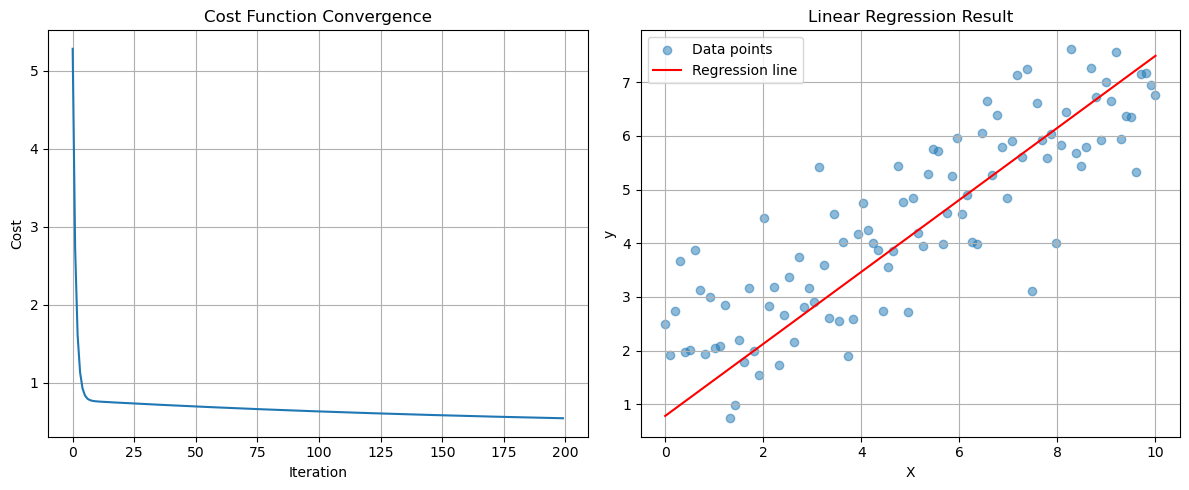

In [5]:
# Plot cost history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)

# Plot final regression line
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, theta0 + theta1 * X, 'r', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Result')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()